In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scanpy as sc
import gc  # 导入垃圾回收模块
from tqdm import tqdm

In [2]:
# Define the input and output directories
input_dir = '/mnt/f/Xujianming_cellreport/{}'
output_dir = '/mnt/f/Xujianming_cellreport/{}/'

# List of folders to process
srr_folders = [
    'SRR15331893', 'SRR15331895', 'SRR15331897', 'SRR15331899',
    'SRR15331901', 'SRR15331903', 'SRR15331905', 'SRR15331907',
    'SRR15331909', 'SRR15331911', 'SRR15331913', 'SRR15331915',
    'SRR15331917'
]

# Loop over all SRR folders, run Scrublet on each file, and save the results
for srr_folder in tqdm(srr_folders, desc="Processing folders..."):
    try:
        input_path = os.path.join(input_dir.format(srr_folder), 'filtered_feature_bc_matrix_SoupX_out')
        output_path = output_dir.format(srr_folder)

        # Check if the Scrublet results already exist
        # Load counts matrix and gene list
        counts_matrix = scipy.io.mmread(os.path.join(input_path, 'matrix.mtx')).T.tocsc()
        genes = np.array(scr.load_genes(os.path.join(input_path, 'genes.tsv'), delimiter='\t', column=1))
        print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
        print('Number of genes in gene list: {}'.format(len(genes)))

        # Initialize Scrublet object
        scrub = scr.Scrublet(counts_matrix=counts_matrix, sim_doublet_ratio=2.0, n_neighbors=None, expected_doublet_rate=0.06)

        # Run the default pipeline
        doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, min_cells=3, min_gene_variability_pctl=85, n_prin_comps=30)

        # Get 2-D embedding to visualize the results
        scrub.set_embedding('UMAP', scr.get_umap(X=scrub.manifold_obs_, n_neighbors=10, min_dist=0.3))

        # Export Scrublet results
        barcodes = pd.read_csv(os.path.join(input_path, 'barcodes.tsv'), delimiter='\t', header=None)
        result = pd.DataFrame([barcodes.iloc[:,0], doublet_scores, predicted_doublets], index=["barcode", "doublet_scores","predicted_doublets"]).T
        result.to_csv(output_path + 'Scrublet_results.csv')

        # Save as h5ad after Scrublet
        adata = sc.read_10x_mtx(path=input_path, var_names='gene_symbols', cache=True)
        adata.var_names_make_unique()
        Cells=pd.read_csv(output_path + 'Scrublet_results.csv', index_col='barcode')
        adata.obs['predicted_doublets']=Cells['predicted_doublets']
        SAS=adata[adata.obs['predicted_doublets']==False]
        SAS.write(output_path + 'raw_after_SoupX_Scrublet.h5ad', compression='gzip')
        # Clear memory
        del counts_matrix, genes, scrub, doublet_scores, predicted_doublets, barcodes, result, adata, Cells
        plt.close('all')
        gc.collect()
    except FileNotFoundError:
        print(f"File not found for {srr_folder}. Skipping...")
        continue




Processing folders...:   0%|                                                        | 0/13 [00:00<?, ?it/s]

Counts matrix shape: 8082 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.0%
Elapsed time: 14.4 seconds


/home/yqcj/miniconda3/envs/scrublet/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Processing folders...:   8%|███▋                                            | 1/13 [01:32<18:30, 92.51s/it]

Counts matrix shape: 9569 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 16.7%
Elapsed time: 17.5 seconds



Processing folders...:  15%|███████▍                                        | 2/13 [03:07<17:14, 94.05s/it]

Counts matrix shape: 9246 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.1%
Elapsed time: 16.9 seconds



Processing folders...:  23%|███████████                                     | 3/13 [04:38<15:26, 92.62s/it]

Counts matrix shape: 13366 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 4.0%
Estimated detectable doublet fraction = 25.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 16.0%
Elapsed time: 30.8 seconds



Processing folders...:  31%|██████████████▍                                | 4/13 [07:41<19:15, 128.36s/it]

Counts matrix shape: 5610 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.8%
Elapsed time: 9.6 seconds



Processing folders...:  38%|██████████████████▍                             | 5/13 [08:27<13:09, 98.69s/it]

Counts matrix shape: 11859 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.6%
Elapsed time: 18.4 seconds



Processing folders...:  46%|██████████████████████▏                         | 6/13 [09:35<10:16, 88.11s/it]

Counts matrix shape: 5636 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.1%
Elapsed time: 8.5 seconds



Processing folders...:  54%|█████████████████████████▊                      | 7/13 [10:15<07:14, 72.46s/it]

Counts matrix shape: 14517 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.23
Detected doublet rate = 3.2%
Estimated detectable doublet fraction = 26.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.4%
Elapsed time: 31.7 seconds



Processing folders...:  62%|█████████████████████████████▌                  | 8/13 [12:10<07:09, 85.92s/it]

Counts matrix shape: 10209 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 19.9 seconds



Processing folders...:  69%|█████████████████████████████████▏              | 9/13 [13:46<05:56, 89.02s/it]

Counts matrix shape: 7594 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 2.8%
Estimated detectable doublet fraction = 31.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.9%
Elapsed time: 11.6 seconds



Processing folders...:  77%|████████████████████████████████████▏          | 10/13 [14:39<03:54, 78.12s/it]

Counts matrix shape: 9561 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.4%
Elapsed time: 16.9 seconds



Processing folders...:  85%|███████████████████████████████████████▊       | 11/13 [16:12<02:44, 82.48s/it]

Counts matrix shape: 17028 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 6.4%
Estimated detectable doublet fraction = 42.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 15.2%
Elapsed time: 29.9 seconds



Processing folders...:  92%|███████████████████████████████████████████▍   | 12/13 [17:59<01:29, 89.96s/it]

Counts matrix shape: 13781 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.71
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.6%
Elapsed time: 25.9 seconds


Processing folders...: 100%|███████████████████████████████████████████████| 13/13 [19:50<00:00, 91.56s/it]


Counts matrix shape: 13781 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.71
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.6%
Elapsed time: 26.1 seconds
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.5%


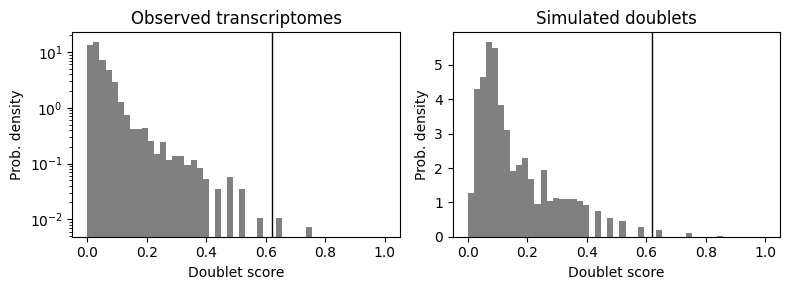

In [3]:
# Define the input and output directories
input_dir = '/mnt/f/Xujianming_cellreport/{}'
output_dir = '/mnt/f/Xujianming_cellreport/{}/'

# List of folders to process
srr_folders = [
'SRR15465825'
]
input_path = os.path.join(input_dir.format(srr_folder), 'filtered_feature_bc_matrix_SoupX_out')
output_path = output_dir.format(srr_folder)
# Load counts matrix and gene list
counts_matrix = scipy.io.mmread(os.path.join(input_path, 'matrix.mtx')).T.tocsc()
genes = np.array(scr.load_genes(os.path.join(input_path, 'genes.tsv'), delimiter='\t', column=1))
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

# Initialize Scrublet object
scrub = scr.Scrublet(counts_matrix=counts_matrix, sim_doublet_ratio=2.0, n_neighbors=None, expected_doublet_rate=0.06)

# Run the default pipeline
doublet_scores = scrub.scrub_doublets(min_counts=2, min_cells=3, min_gene_variability_pctl=85, n_prin_comps=30)

# Call doublets with a user-specified threshold
predicted_doublets = scrub.call_doublets(threshold=0.62)

# Get 2-D embedding to visualize the results
scrub.set_embedding('UMAP', scr.get_umap(X=scrub.manifold_obs_, n_neighbors=10, min_dist=0.3))

scrub.plot_histogram()

# Export Scrublet results
barcodes = pd.read_csv(os.path.join(input_path, 'barcodes.tsv'), delimiter='\t', header=None)
barcode_series = pd.Series(barcodes.iloc[:, 0], name="barcode")
doublet_scores_series = pd.Series(doublet_scores[0], name="doublet_scores")
predicted_doublets_series = pd.Series(predicted_doublets, name="predicted_doublets")
result = pd.concat([barcode_series, doublet_scores_series, predicted_doublets_series], axis=1)
result.to_csv(output_path + 'Scrublet_results.csv')

# Save as h5ad after Scrublet
adata = sc.read_10x_mtx(path=input_path, var_names='gene_symbols', cache=True)
adata.var_names_make_unique()
Cells=pd.read_csv(output_path + 'Scrublet_results.csv', index_col='barcode')
adata.obs['predicted_doublets']=Cells['predicted_doublets']
SAS=adata[adata.obs['predicted_doublets']==False]
SAS.write(output_path + 'raw_after_SoupX_Scrublet.h5ad', compression='gzip')



In [4]:
# Define the input and output directories
input_dir = '/mnt/f/Xujianming_cellreport/{}'
output_dir = '/mnt/f/Xujianming_cellreport/{}/'

# List of folders to process
srr_folders = [
'SRR15465826', 'SRR15465827'
]

# Loop over all SRR folders, run Scrublet on each file, and save the results
for srr_folder in tqdm(srr_folders, desc="Processing folders..."):
    try:
        input_path = os.path.join(input_dir.format(srr_folder), 'filtered_feature_bc_matrix_SoupX_out')
        output_path = output_dir.format(srr_folder)

        # Load counts matrix and gene list
        counts_matrix = scipy.io.mmread(os.path.join(input_path, 'matrix.mtx')).T.tocsc()
        genes = np.array(scr.load_genes(os.path.join(input_path, 'genes.tsv'), delimiter='\t', column=1))
        print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
        print('Number of genes in gene list: {}'.format(len(genes)))

        # Initialize Scrublet object
        scrub = scr.Scrublet(counts_matrix=counts_matrix, sim_doublet_ratio=2.0, n_neighbors=None, expected_doublet_rate=0.06)

        # Run the default pipeline
        doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, min_cells=3, min_gene_variability_pctl=85, n_prin_comps=30)

        # Get 2-D embedding to visualize the results
        scrub.set_embedding('UMAP', scr.get_umap(X=scrub.manifold_obs_, n_neighbors=10, min_dist=0.3))

        # Export Scrublet results
        barcodes = pd.read_csv(os.path.join(input_path, 'barcodes.tsv'), delimiter='\t', header=None)
        result = pd.DataFrame([barcodes.iloc[:,0], doublet_scores, predicted_doublets], index=["barcode", "doublet_scores","predicted_doublets"]).T
        result.to_csv(output_path + 'Scrublet_results.csv')

        # Save as h5ad after Scrublet
        adata = sc.read_10x_mtx(path=input_path, var_names='gene_symbols', cache=True)
        adata.var_names_make_unique()
        Cells=pd.read_csv(output_path + 'Scrublet_results.csv', index_col='barcode')
        adata.obs['predicted_doublets']=Cells['predicted_doublets']
        SAS=adata[adata.obs['predicted_doublets']==False]
        SAS.write(output_path + 'raw_after_SoupX_Scrublet.h5ad', compression='gzip')
        # Clear memory
        del counts_matrix, genes, scrub, doublet_scores, predicted_doublets, barcodes, result, adata, Cells
        plt.close('all')
        gc.collect()
    except FileNotFoundError:
        print(f"File not found for {srr_folder}. Skipping...")
        continue




Processing folders...:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Counts matrix shape: 9287 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.6%
Elapsed time: 18.1 seconds



Processing folders...:  50%|████████████████████████▌                        | 1/2 [01:27<01:27, 87.93s/it]

Counts matrix shape: 9250 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 17.1 seconds


Processing folders...: 100%|█████████████████████████████████████████████████| 2/2 [02:53<00:00, 86.81s/it]
